## Testing Geoplanar Real World Data

Welcome to `geoplanar`, a package for [planar enforcement](https://ibis.geog.ubc.ca/courses/klink/gis.notes/ncgia/u12.html#SEC12.6) for polygon (multipolygon) [GeoSeries/GeoDataFrames](https://github.com/geopandas/geopandas).

This notebook is intented to test geoplanar on real world data, creating artifical gaps related to planar enforcement violations.

Examples are adopted from [geopandas](https://geopandas.org/en/stable/docs.html)



In [1]:
import geoplanar
import geopandas 
import numpy as np
import matplotlib.pyplot as plt
import geoplanar
from shapely.geometry import box, Polygon

### 1. Data 

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

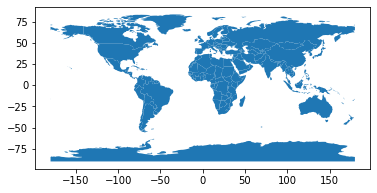

In [3]:
# Simple plot of the world
world.plot()

In [4]:
# Checking the coordinate system
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
world = world.to_crs("EPSG:3395") # world.to_crs(epsg=3395)

In [6]:
# geopandas have the data fro New York Borough Boundaries
nybb_path = geopandas.datasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


<AxesSubplot:>

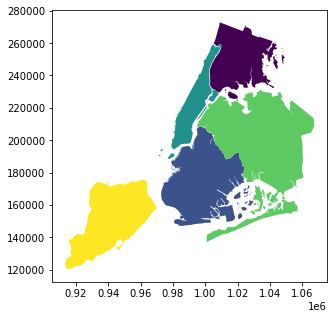

In [7]:
boros.plot(column= 'BoroName', # Column for the BoroName
             figsize=(5,5), # size of the figure
           cmap='viridis') # Color for the map

In [64]:
geoplanar.gaps(boros)

,geometry


<AxesSubplot:>

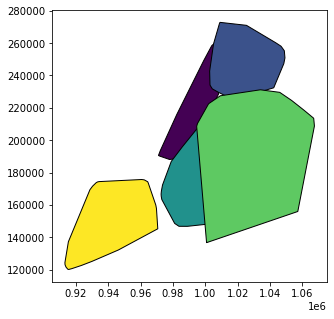

In [8]:
boros_convex= boros['geometry'].convex_hull
boros_convex.plot(figsize=(5,5), # figure size
                  cmap='viridis', # color of the map
                  edgecolor="black", # color of the outline
                  linewidth=1) # thickness of the edgecolor

In [9]:
import numpy as np
from geopandas import GeoSeries
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])


In [10]:
circles = pts.buffer(4000) # draw a circle with fixed radius around each point

In [11]:
mp = circles.unary_union #collapse these circles into a single MultiPolygon geometry with

In [12]:
boros_new = boros['geometry'].intersection(mp) # here we have created artifical gaps in the data

<AxesSubplot:>

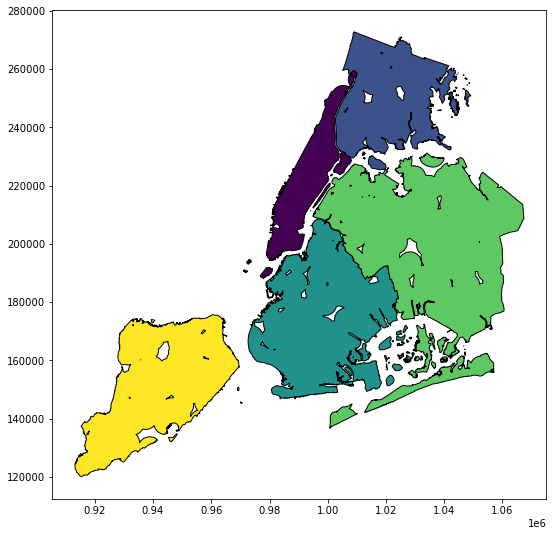

In [13]:
boros_new.plot(figsize=(9,9), # size of the figure
           cmap='viridis',
         edgecolor="black", # color of the outline
                  linewidth=1) # thickness of the edgecolor

In [14]:
gaps = boros['geometry'].difference(mp)


<AxesSubplot:>

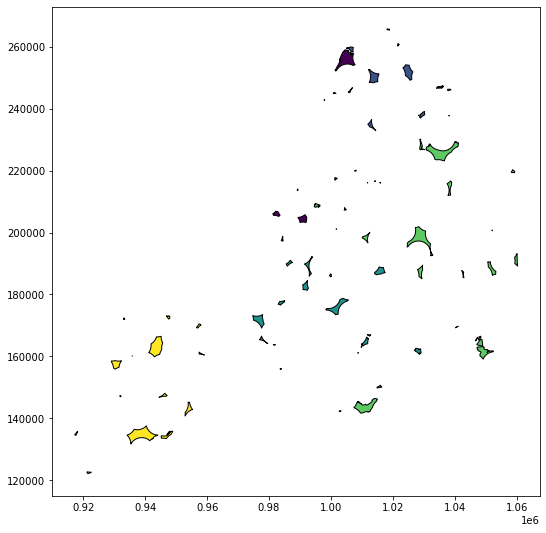

In [15]:
gaps.plot(figsize=(9,9), # size of the figure
           cmap='viridis',
         edgecolor="black", # color of the outline
                  linewidth=1) # thickness of the edgecolor

In [16]:
boros_new.head()

BoroCode
1    MULTIPOLYGON (((980940.519 188435.398, 980873....
2    MULTIPOLYGON (((1012785.913 229165.348, 101270...
3    MULTIPOLYGON (((1021002.862 151329.108, 102087...
4    MULTIPOLYGON (((1029578.007 156052.222, 102958...
5    MULTIPOLYGON (((970227.216 145641.634, 970273....
dtype: geometry

In [17]:
gaps.area / boros.geometry.area #calculate the fractional area in each borough that are in the gaps:


BoroCode
1    0.040600
2    0.020736
3    0.020504
4    0.029533
5    0.035122
dtype: float64

<AxesSubplot:>

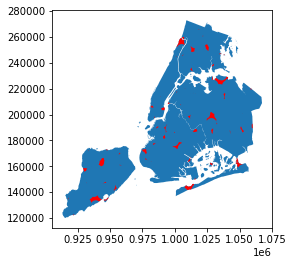

In [18]:
base = boros.plot()
gaps.plot(color='red', ax=base)

In [19]:
gaps.head()

BoroCode
1    MULTIPOLYGON (((994984.566 208997.712, 994932....
2    MULTIPOLYGON (((1037666.519 245903.697, 103770...
3    MULTIPOLYGON (((1028199.290 162498.652, 102820...
4    MULTIPOLYGON (((1049037.265 163150.711, 104905...
5    MULTIPOLYGON (((948776.621 135571.865, 948334....
dtype: geometry

## Testing Geoplanar

<AxesSubplot:>

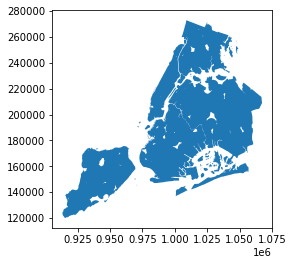

In [66]:
boros_new.plot()

In [61]:
geoplanar.gaps(boros_new)

,geometry
2,"POLYGON ((943159.849 165247.224, 943361.656 16..."
3,"POLYGON ((944802.347 146843.673, 944501.926 14..."
4,"POLYGON ((917985.275 135319.649, 917817.442 13..."
5,"POLYGON ((933270.533 171956.763, 932945.703 17..."
6,"POLYGON ((935857.403 160164.816, 935747.935 16..."
7,"POLYGON ((932084.799 147284.789, 932172.552 14..."
8,"POLYGON ((954642.290 143937.683, 954810.123 14..."
9,"POLYGON ((957034.931 169953.043, 957236.737 17..."
10,"POLYGON ((957386.424 161375.065, 957420.657 16..."
11,"POLYGON ((1000082.971 186211.034, 1000169.242 ..."


In [62]:
g.shape

(42, 1)

<AxesSubplot:>

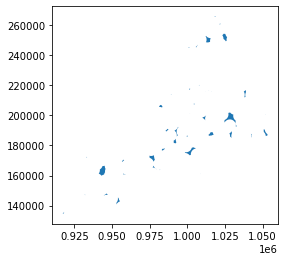

In [65]:
g.plot()

In [67]:
df= geoplanar.fill_gaps(boros_new)

ValueError: 'left_df' should be GeoDataFrame, got <class 'geopandas.geoseries.GeoSeries'>